# 1. 데이터 마트 개발을 위한 데이터 전처리

<h3><dl><dt>(1) 데이터 정제 과정</dt>
<dd><li>결측값 처리</li></dd>
<dd><li>이상값 처리</li></dd>
<dt>(2) 분석 변수 처리 과정</dt>
<dd><li>변수 선택</li></dd>
<dd><li>차원 축소</li></dd>
<dd><li>요약변수 생성</li></dd>
<dd><li>파생변수 생성</li></dd>
<dd><li>변수 변환</li></dd>
<dd><li>클래스 불균형(불균형 데이터)처리</li></dd>

</dl>
</h3>

## 1) 데이터 정제 과정

### (1) 결측값 처리
<li>결측값은 존재하지 않는 데이터를 의미</li>
<li>NA(Not Available)로 표현하지만 NaN, null, 공백，-1 등 다양하게 표현</li>
<li>결측값을 삭제하는 것이 일반적이나 경우
에 따라의미를갖는경우도 있다. (예: 특정 설문문햄l 대해 결측값이 많다는것은해당문항의 민감함을 나타내는 측도로써 활용 기능하다)</li>
<li>결측값 처리를 위한 대표적인 패커지로 Amelia와 DMwR2 패키지가 있다.</li>


In [ ]:
head(iris,3)
summary(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [ ]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
sum(is.na(iris))

[1] 0

In [ ]:
# 결측값 생성
copy_iris<-iris
copy_iris[sample(1:150,30),1]<-NA # 30 개의 결측값 생성
dim(copy_iris)

[1] 150   5

In [ ]:
sum(is.na(copy_iris))

[1] 30

### Amelia 패키지의 missmap으로 결측값 시각화

In [ ]:
install.packages("Amelia")
library(Amelia)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppArmadillo’


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



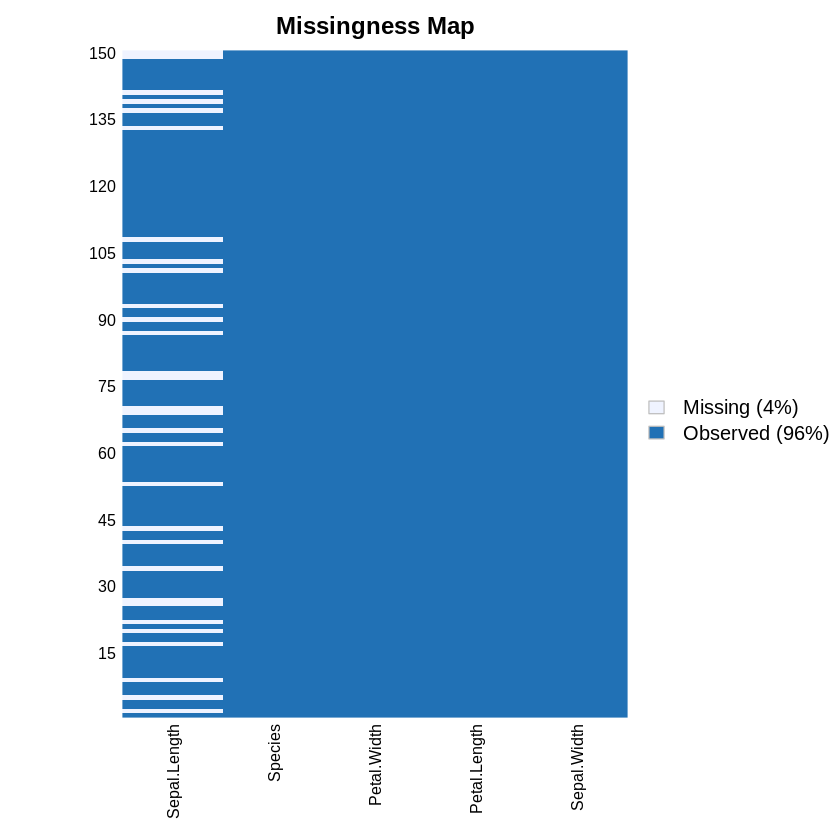

In [ ]:
missmap(copy_iris)

### (2) 결측값 대치 방법 4가지
<li>단순 대치법</li>
<li>평균 대치법</li>
<li>단순 확률 대치법</li>
<li>다중 대치법</li>

### 단순 대치법
#### <li>결측값이 존재하는 데이터를 삭제</li>
#### <li>가장쉬운결측값처리 방법이지만결측값이 많은경우대량의 데이터 손실이 발생</li>
#### <li>complete . cases는 하나의 열에 결측값이 존재하면 FALSE, 존재하지 않으면 TRUE를 반환</li>

In [ ]:
# 단순 대치법
copy_iris<-copy_iris[complete.cases(copy_iris),]
dim(copy_iris)

[1] 120   5

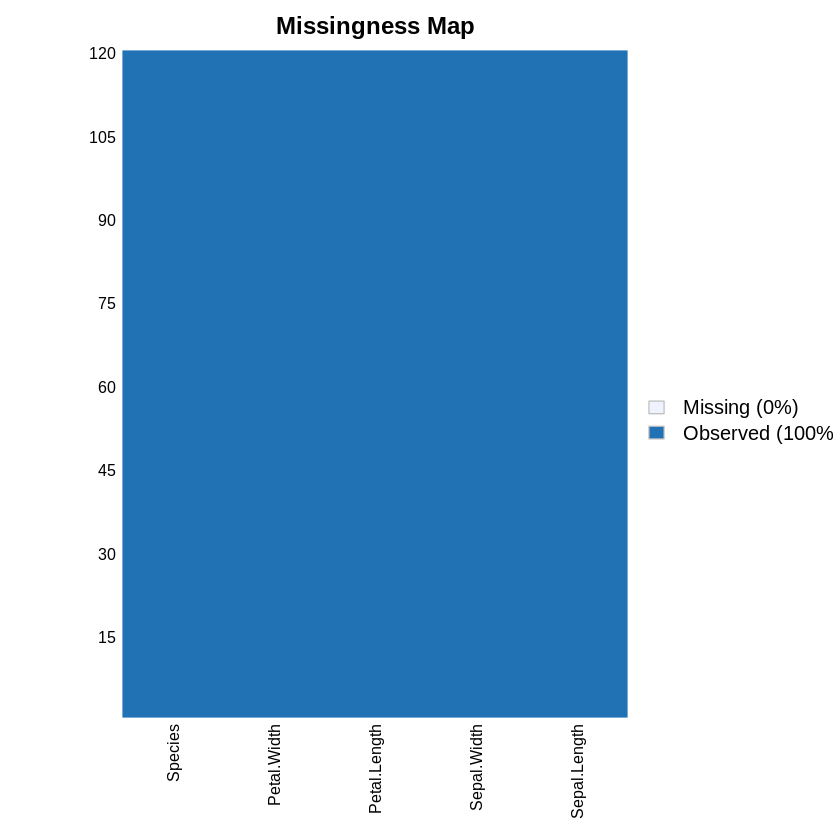

In [ ]:
missmap(copy_iris)

### 평균 대치법
#### <li>데이터를 대표할 수 있는 평균 혹은 중앙값으로 결측값을 대치</li>
#### <li>비조건부 평균 대치법: 데이터의 평균값으로 결측값을 대치</li>
#### <li>조건부 평균 대치법: 실제 값들을 분석하여 회귀분석을 활용하는 대치 방법</li>
#### <li>DMwR2 패키지의 central Imputation 함수를 사용하여 쉽게 대치</li>

In [ ]:
# 결측값 생성
copy_iris<-iris
copy_iris[sample(1:150,30),1]<-NA # 30 개의 결측값 생성
dim(copy_iris)

[1] 150   5

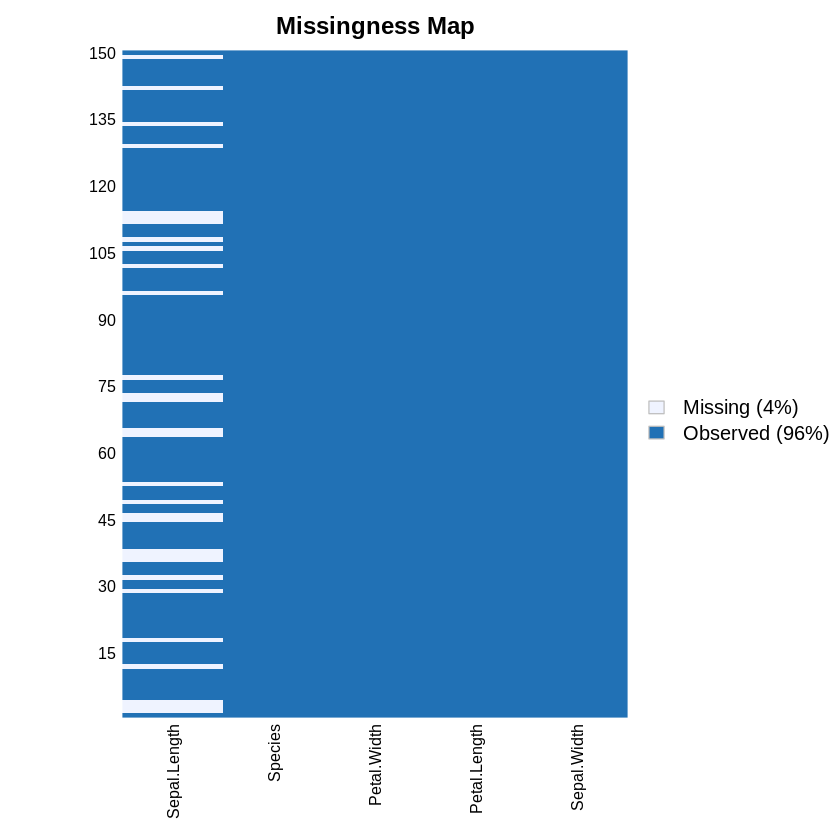

In [ ]:
missmap(copy_iris)

In [ ]:
# 평균 대치법
mean_value<-mean(copy_iris$Sepal.Length,na.rm=T)
mean_value

[1] 5.833333

In [ ]:
copy_iris$Sepal.Length[is.na(copy_iris$Sepal.Length)]<-mean_value

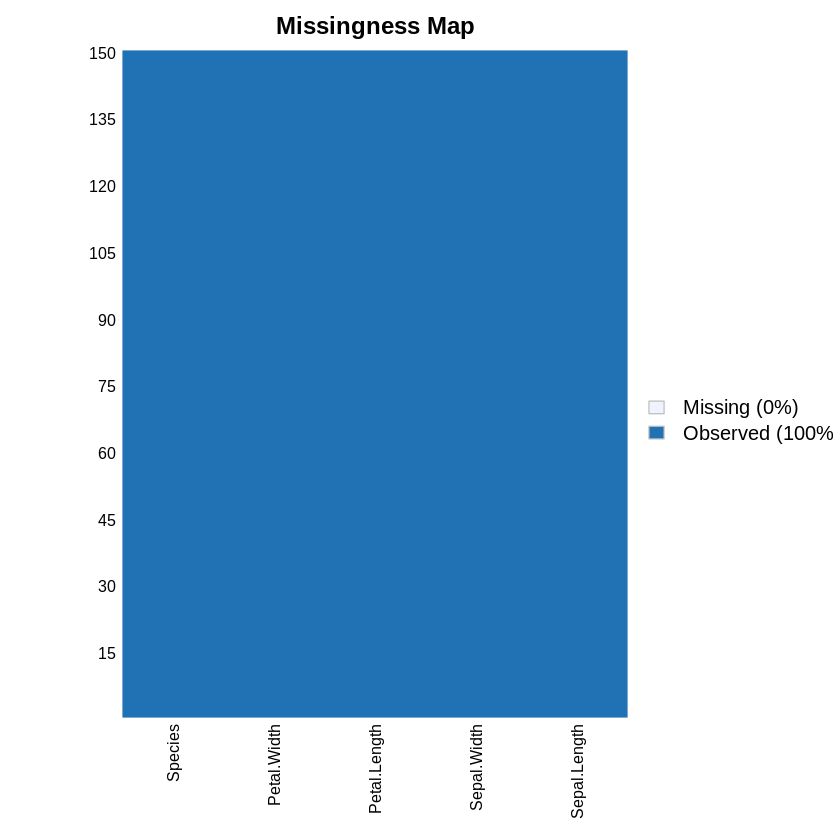

In [ ]:
missmap(copy_iris)

In [ ]:
# 결측값 생성
copy_iris<-iris
copy_iris[sample(1:150,30),1]<-NA # 30 개의 결측값 생성
dim(copy_iris)

[1] 150   5

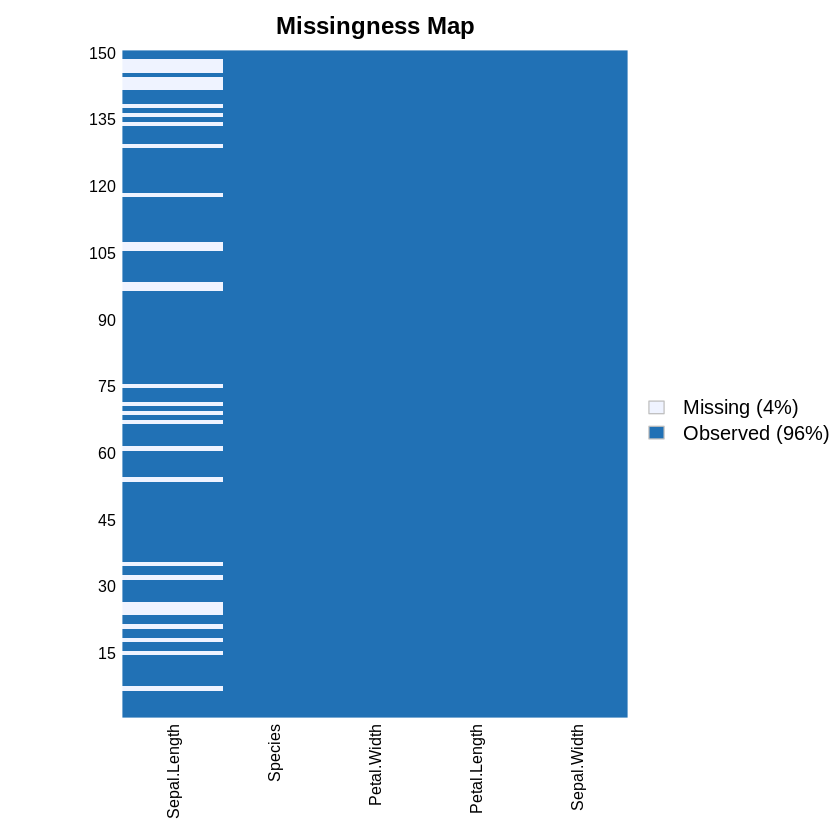

In [ ]:
missmap(copy_iris)

In [ ]:
# centralImputation을 활용한 중앙값 대치
install.packages('DMwR2')
library(DMwR2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘xts’, ‘zoo’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
copy_iris<-centralImputation(copy_iris)

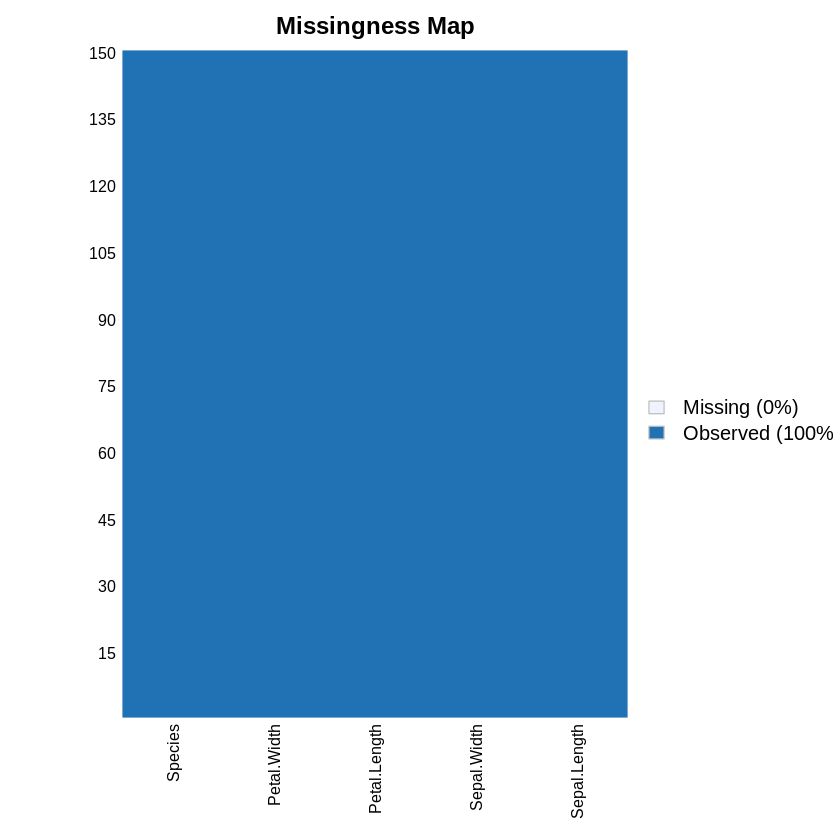

In [ ]:
missmap(copy_iris)

### 단순 확률 대치법
#### <li>평균 대치법에서 추정량 표준 오차의 과소 추정 문제를 보완하고자 고안된 방법</li>
#### <li>K -Nearest Neighbor 방법: K 최근접 이웃 알고리즘으로 주변 K개의 데이터 중 가장 많은 데이터로 대치하는 방법</li>
#### <li>knnImputation</li>

In [ ]:
# 결측값 생성
copy_iris<-iris
copy_iris[sample(1:150,30),1]<-NA # 30 개의 결측값 생성
dim(copy_iris)

[1] 150   5

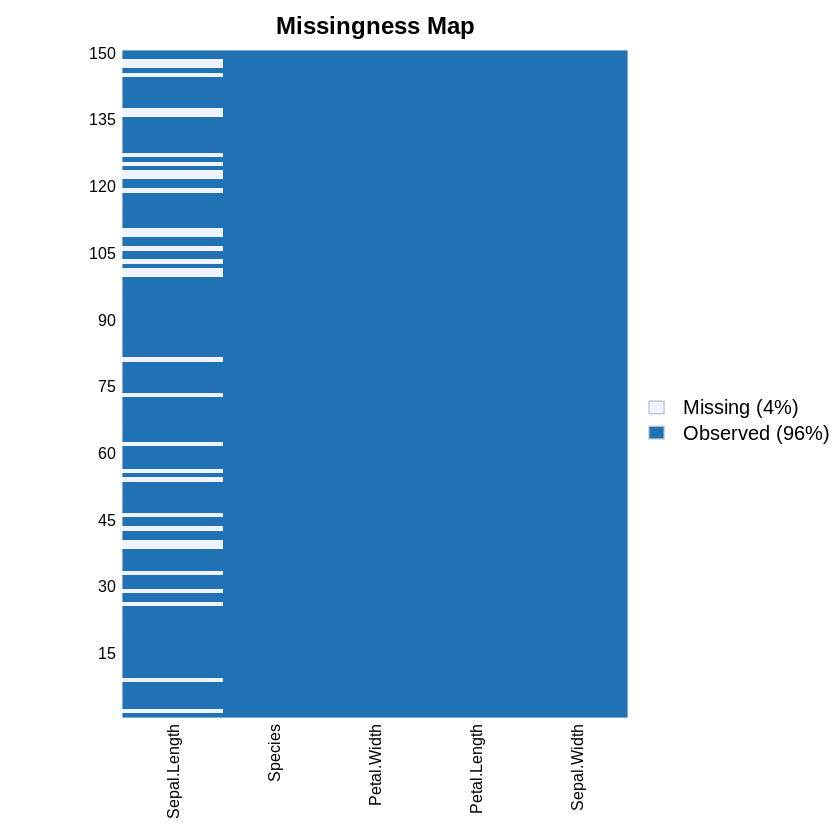

In [ ]:
missmap(copy_iris)

In [ ]:
copy_iris<-knnImputation(copy_iris,k=10)

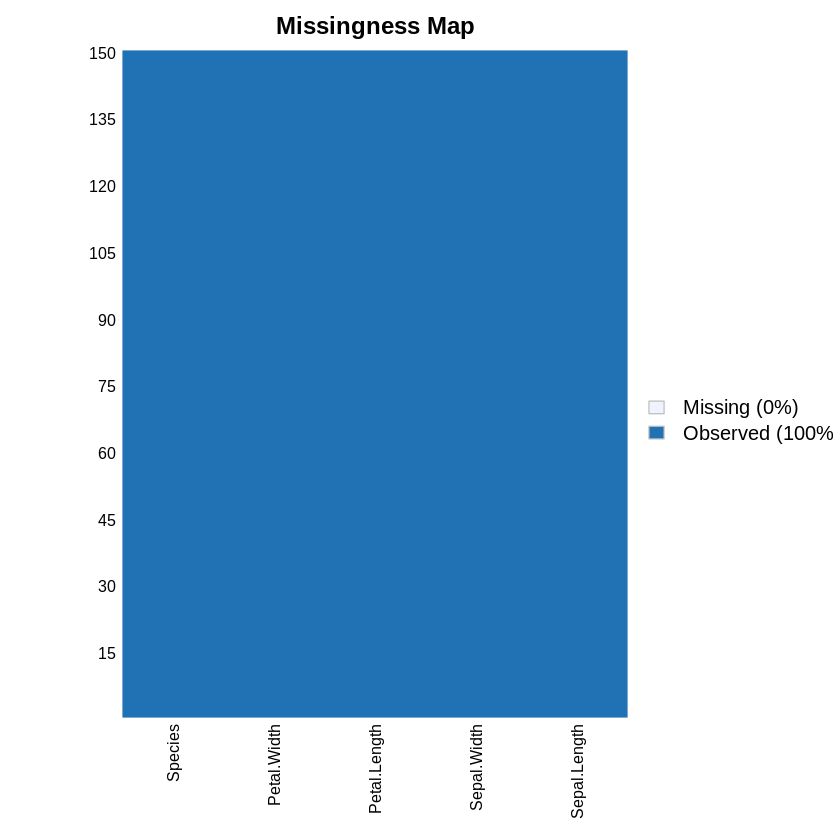

In [ ]:
missmap(copy_iris)

### 다중 대치법
#### <li>여러 번의 대치를 통해 n개의 임의 완전자료를 만드는 방법</li>
#### <li>결측값 대치，분석，결합의 세 단계로 구성</li>
#### <li>Amelia 패키지 사용</li>

In [ ]:
# 결측값 생성
copy_iris<-iris
copy_iris[sample(1:150,30),1]<-NA # 30 개의 결측값 생성
dim(copy_iris)

[1] 150   5

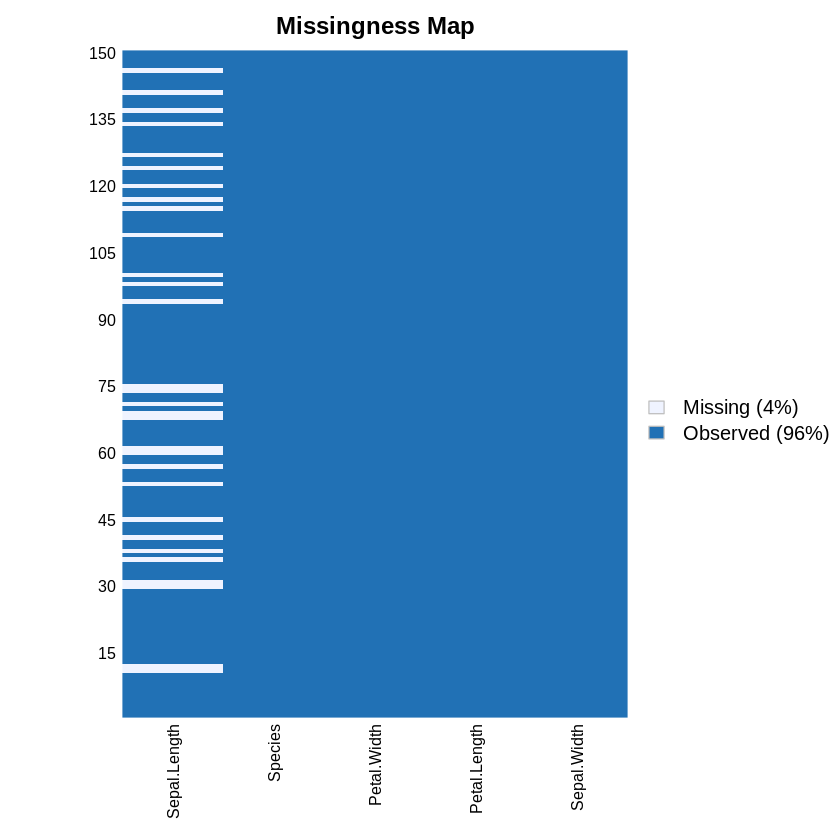

In [ ]:
missmap(copy_iris)

In [ ]:
install.packages('Amelia')
library(Amelia)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
iris_imp<-amelia(copy_iris,m=3,cs='Species') # m은 가상데이터셋 갯수
copy_iris$Sepal.Length<-iris_imp$imputations[[3]]$Sepal.Length

-- Imputation 1 --

  1  2  3

-- Imputation 2 --

  1  2  3

-- Imputation 3 --

  1  2  3



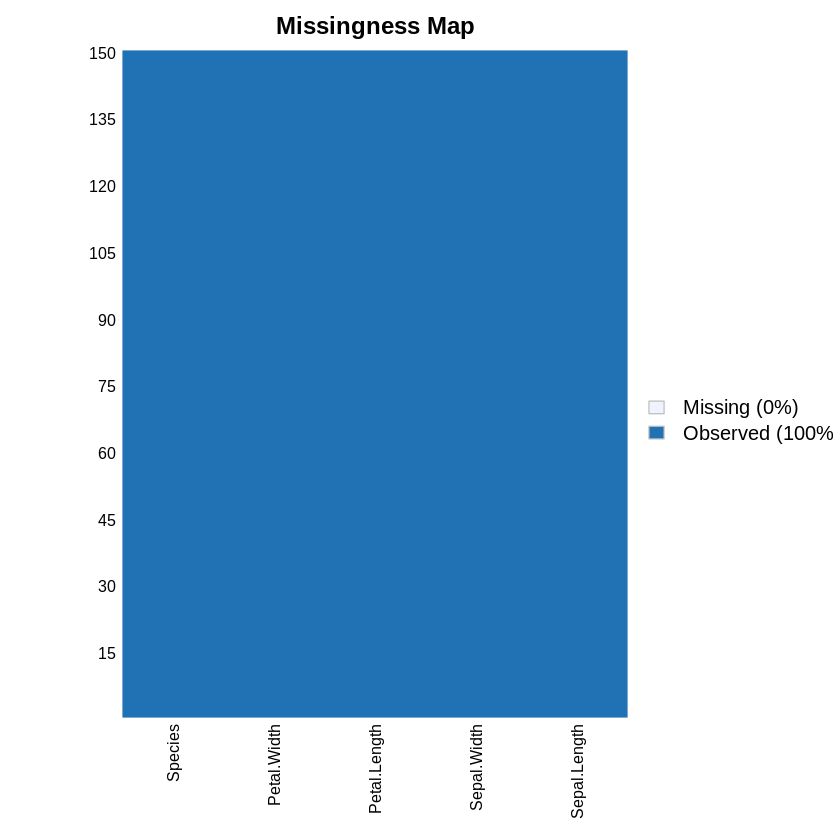

In [ ]:
missmap(copy_iris)

### (3) 이상값 처리
#### 이상값이란?
<li>다른 데이터와 비교하였을 때 극단적으로 크거나 극단적으로 작은 값</li>
<li>결측값과 마찬가지로 이상값도 제거하는 것이 일반적</li>
<li>의미를 갖는 경우도 있으므로 목적이나 종류에 따라 시용자의 적절한 판단 필요</li>

#### 이상값 판단 ***

##### ESD(Extreme Studenized Deviation)
<li>ESD는 평균으로부터 ‘표준편차 3’만큼 떨어진 값들을 이상값으로 인식히는 방법</li>
<li>정규분포에서 99.7%의 자료들은 ‘표준편차 3’ 안에 위치하므로 전체 데이터의 약 0.3퍼센트를 이상값으로 구분</li>


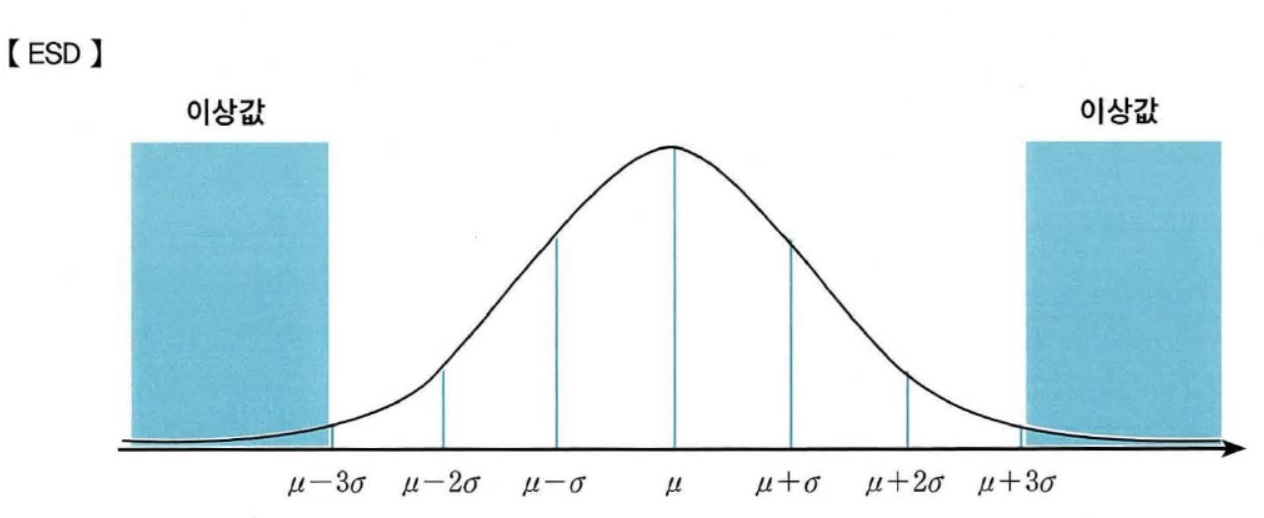

#### 사분위수 ***
<li>사분위수를 이용하여 25%에 해당하는 값(Q1)과 75%에 해당히는 값(Q3)을 촬용하여 이상치를 판단하는 방법</li>
<li>IQR이란 사분위의 정상 범위인 Q3 - Q1 값</li>
<li>사분범위에서 1.5분위수를 벗어나는 경우 이상치로 판단</li>
<li>Q1 - 1.5 x IQR(하한 최솟값)보다 작거나 Q3 + 1.5 x IQR(상한 최뱃값)보다 큰 값은 이상값으로 간주</li>
<li>시각적으로 상자 그림의 이웃라어어에 위치해 점으로 표현된 데이터를 이상값으로 판단</li>


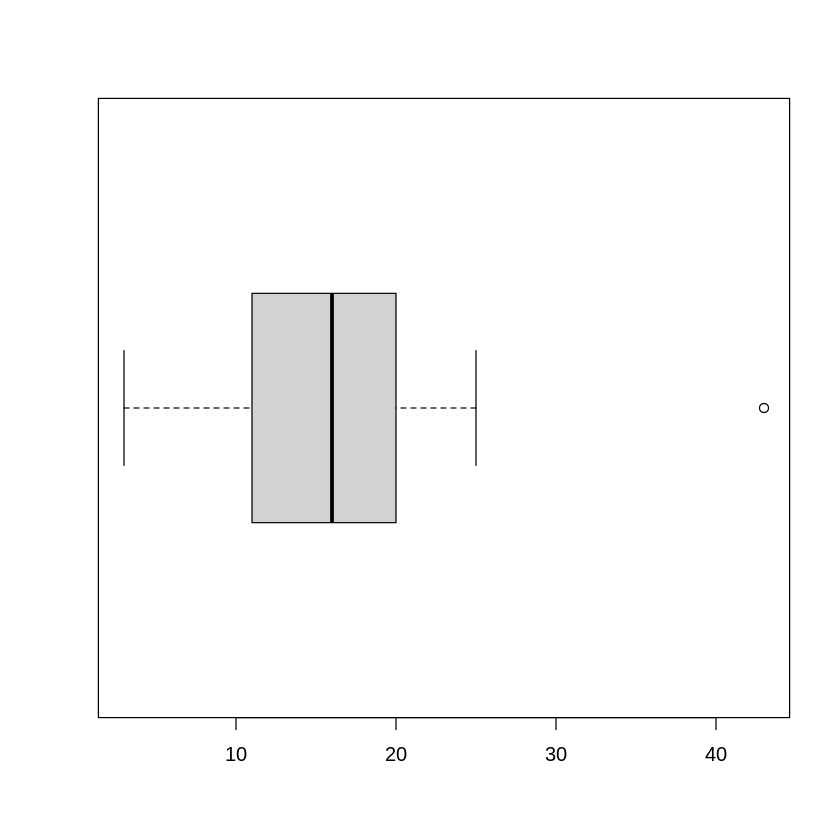

In [ ]:
data <- c(3, 10, 13, 16, 11, 20, 17, 25, 43)
boxplot(data, horizontal = T)

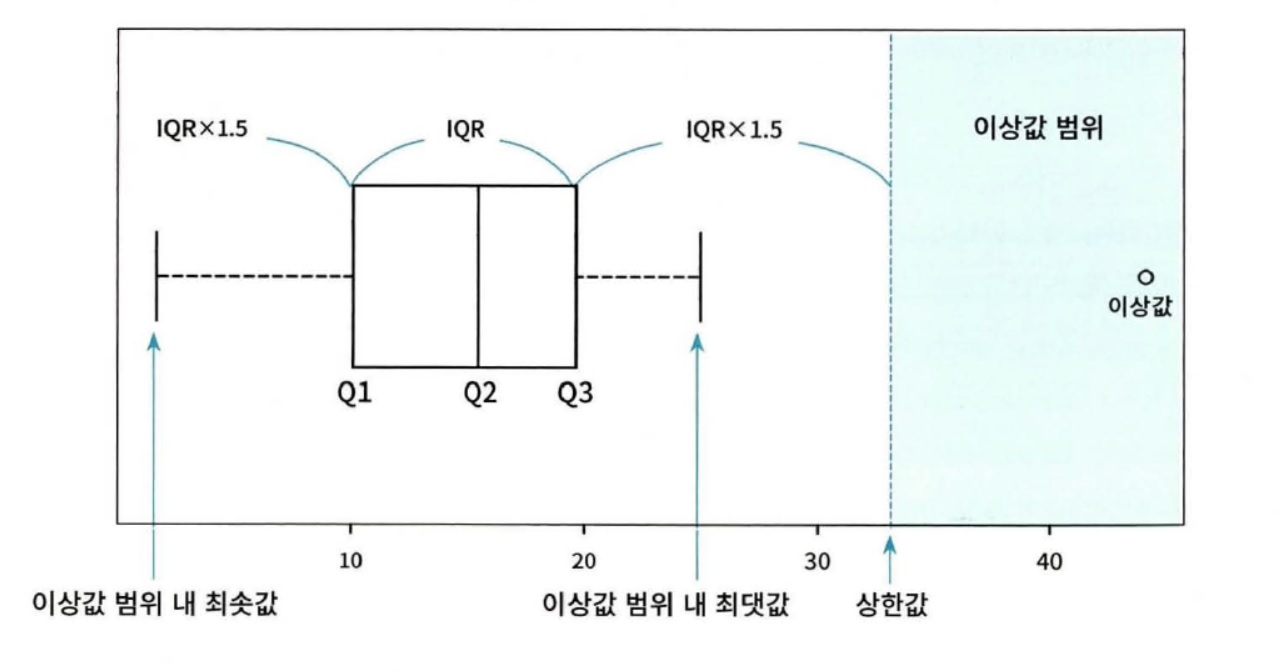

In [ ]:
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   11.00   16.00   17.56   20.00   43.00 

아웃라이어(이상값) 계산
Q1 = 11
Q3 = 20





In [ ]:
# 하한값 Q1 - 1.5 X (20-11)
11 - 1.5 * (20-11)

[1] -2.5

In [ ]:
# 상한값 Q3 + 1.5 X (20-11)
20 + 1.5 * (20-11)

[1] 33.5